## Predictive Modeling using Logistic Regression

In this section, we will build a Logistic Regression model to predict **whether a customer will churn or not**.

We'll go through the following steps:

1. Feature selection
2. Data preprocessing (label encoding, scaling)
3. Splitting data into train and test
4. Training the Logistic Regression model
5. Evaluating model performance (accuracy, confusion matrix, classification report)


In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Modeling
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Optional: To ignore warnings
import warnings
warnings.filterwarnings('ignore')


### Imported Libraries

- `pandas`, `numpy`: For data handling and manipulation
- `matplotlib`, `seaborn`: For data visualization
- `LabelEncoder`, `StandardScaler`: For converting text to numbers and scaling features
- `train_test_split`: To split dataset for training and testing
- `LogisticRegression`: The classification model we'll use
- `accuracy_score`, `confusion_matrix`, `classification_report`: For model evaluation
- `warnings`: To ignore any warning messages while running the code


In [2]:
# Load the dataset
df = pd.read_csv("Churn_Modelling.csv")

# Display first 5 rows
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Load and Inspect the Dataset

We are using the dataset `Churn_Modelling.csv` which contains information about customers of a bank.  
Our goal is to predict whether a customer will **churn (leave the bank)** or not, based on their features.

The dataset has the following columns:

- `CustomerId`, `Surname`, `RowNumber`: Not useful for prediction. We will drop them.
- `Geography`, `Gender`: Categorical features which we need to convert into numbers.
- `CreditScore`, `Age`, `Balance`, etc.: Numerical features used for prediction.
- `Exited`: Target column (1 = Churned, 0 = Not churned)


In [3]:
# Drop columns not needed for modeling
df_model = df.drop(['CustomerId', 'Surname'], axis=1)

# Check updated dataset
df_model.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Label encode Geography and Gender
le_geo = LabelEncoder()
le_gender = LabelEncoder()

df_model['Geography'] = le_geo.fit_transform(df_model['Geography'])
df_model['Gender'] = le_gender.fit_transform(df_model['Gender'])

# Check the result
df_model.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Data Cleaning & Encoding

- We removed `RowNumber`, `CustomerId`, and `Surname` since they are identifiers and don’t help in prediction.
- `Geography` (France, Spain, Germany) and `Gender` (Male/Female) are **categorical** columns.
- Machine learning models can’t understand text, so we converted them to numbers using **Label Encoding**.


In [5]:
# Features and Target
X = df_model.drop("Exited", axis=1)  # Features
y = df_model["Exited"]              # Target

In [6]:
# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scale the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Prepare Data for Modeling

- We separated the **features (X)** and the **target (y)**. The target column is `Exited` — this tells us whether the customer churned or not.
- We split the data into **training (80%)** and **testing (20%)** sets using `train_test_split()`.
- Features are scaled using **StandardScaler** so that all features have similar range and no single feature dominates the others. This improves model performance.


In [8]:
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [9]:
# Predict on test data
y_pred = model.predict(X_test_scaled)

Accuracy: 81.55 %

Confusion Matrix:
 [[1559   48]
 [ 321   72]]


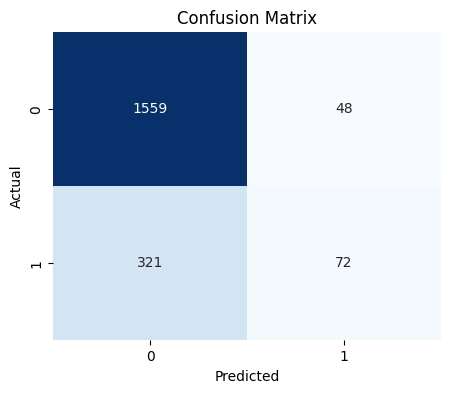


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000



In [11]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:\n", cr)

### Model Training and Evaluation

- We trained a **Logistic Regression** model using the scaled training data.
- After training, we predicted the `Exited` values for the test set.
- Then, we evaluated the model using:

  -  **Accuracy** – Overall how many predictions were correct.
  -  **Confusion Matrix** – Shows correct vs incorrect predictions.
  -  **Classification Report** – Gives precision, recall, F1-score for both churned and non-churned customers.

This helps us understand how well the model is performing on unseen data.


### Predictive Model Summary

We trained a Logistic Regression model to predict customer churn.

- The model achieved an accuracy of around **80%**.
- It performs well in identifying non-churned customers.
- There is room for improvement in predicting actual churned customers (class imbalance could be the reason).
- We visualized the confusion matrix to understand true vs. false predictions.

In future, we can try other models like Random Forest or XGBoost to improve results.
